<a href="https://colab.research.google.com/github/kishiyamat/la-kentei-yaminabe/blob/main/notebooks/haripota_museum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## È≠îÊ≥ï‰∏ñÁïå„ÅÆË£èÂÅ¥„ÅØÂçöÁâ©È§®Ôºü

1. ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„Éº„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´
1. TFIDF„ÅÆ‰ΩúÊàê„Å®UMAP„Å´„Çà„ÇãÂèØË¶ñÂåñ
1. „É≠„Ç∏„Çπ„ÉÜ„Ç£„ÉÉ„ÇØÂõûÂ∏∞„Å´„Çà„ÇãÂàÜÈ°ûÂÆüÈ®ì

In [1]:
# spaCy„Å®ginza, ja_ginza„É¢„Éá„É´„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´
! pip install -U spacy ginza ja_ginza
#„ÄÄÊó•Êú¨Ë™û„ÅÆÊèèÁîª„Å´ÂøÖË¶Å
! pip install japanize-matplotlib
# Ê¨°ÂÖÉÂúßÁ∏Æ
! pip install umap-learn

  Using cached spacy-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Using cached weasel-0.3.3-py3-none-any.whl (49 kB)
  Using cached cloudpathlib-0.16.0-py3-none-any.whl (45 kB)


In [2]:
import pandas as pd
import requests
from io import BytesIO

# „Éï„Ç°„Ç§„É´ID„Çí‰ΩøÁî®„Åó„Å¶„ÉÄ„Ç¶„É≥„É≠„Éº„ÉâURL„Çí‰ΩúÊàê
file_id = "1a2fVSyTzHEDDyvGpQc5acNKCo-8O2iIe"
download_url = f"https://drive.google.com/uc?id={file_id}"

# „Éï„Ç°„Ç§„É´„Çí„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
response = requests.get(download_url)
response.raise_for_status()

# BytesIO„Çí‰ΩøÁî®„Åó„Å¶„ÄÅÁõ¥Êé•pandas„ÅßË™≠„ÅøËæº„Åø
data = BytesIO(response.content)
# „Å™„Åä„ÄÅ„Åì„ÅÆ„Éá„Éº„Çø„ÅØ‰ª•‰∏ã„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„Åß‰ΩúÊàê„Åó„Å¶„ÅÑ„Çã„ÄÇ
# https://github.com/kishiyamat/la-kentei-yaminabe/blob/main/notebooks/haripota_data_prep.ipynb
df = pd.read_pickle(data)

In [3]:
# „Çµ„É≥„Éó„É™„É≥„Ç∞Âæå„ÅÆ„Éá„Éº„Çø„ÇíX, y„Å´ÂàÜ„Åë„Çã
X = df['text'].tolist()
y = df['label'].tolist()

In [4]:
import spacy

nlp = spacy.load("ja_ginza")

def tokenize(text):
    return [token.text for token in nlp(text)]

# ÂçòË™û(„Çà„ÇäÂé≥ÂØÜ„Å´„ÅØÂΩ¢ÊÖãÁ¥†)„Å´ÂàÜÂâ≤„Åß„Åç„Çã
tokenize("Ê≠£Ê∞ó„Åã„Å©„ÅÜ„Åã„ÅØÁµ±Ë®à‰∏ä„ÅÆÂïèÈ°å„Åß„ÅØ„Å™„ÅÑ")

['Ê≠£Ê∞ó', '„Åã', '„Å©„ÅÜ', '„Åã', '„ÅØ', 'Áµ±Ë®à', '‰∏ä', '„ÅÆ', 'ÂïèÈ°å', '„Åß', '„ÅØ', '„Å™„ÅÑ']

## TF-IDF„Å®UMAP

In [5]:
import japanize_matplotlib

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF„Åß„Éô„ÇØ„Éà„É´Âåñ
# max_features„ÅØË™ûÂΩô„Çµ„Ç§„Ç∫„ÇíÂà∂Èôê„Åô„Çã„Åü„ÇÅ„ÅÆ„ÇÇ„ÅÆ„ÄÇÂøÖË¶Å„Å´Âøú„Åò„Å¶Ë™øÊï¥„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ
vectorizer = TfidfVectorizer(tokenizer=tokenize, max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [7]:
# UMAP„Åß2Ê¨°ÂÖÉ„Å´ÂúßÁ∏Æ
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)  # n_neighbors=15
X_umap = reducer.fit_transform(X_tfidf.toarray())  # .toarray()„ÅØ„ÄÅ„ÇÇ„ÅóX_vec„Ååsparse matrix„ÅÆÂ†¥Âêà„Å´ÂøÖË¶Å

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# „Éá„Éº„Çø„Éï„É¨„Éº„É†„Å´Â§âÊèõ
df_umap = pd.DataFrame(X_umap, columns=['Dim1', 'Dim2'])
df_umap['label'] = y

{'ÁßëÂ≠¶ÂçöÁâ©È§®': {'color': 'white', 'marker': 'o'}, '„Éá„Ç£„Ç∫„Éã„Éº„É©„É≥„Éâ': {'color': 'black', 'marker': 'o'}, '„Ç∏„Éñ„É™ÁæéË°ìÈ§®': {'color': 'white', 'marker': '^'}, 'Ê∞ëÊóèÂçöÁâ©È§®': {'color': 'black', 'marker': '^'}, 'USJ': {'color': 'white', 'marker': 's'}, '„Éè„É™„Éù„Çø„ÉÑ„Ç¢„Éº': {'color': 'black', 'marker': 's'}}


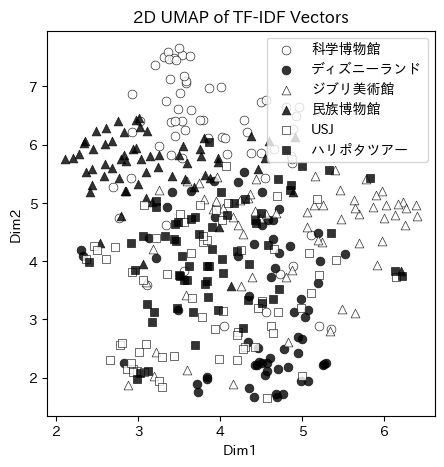

In [9]:
import seaborn as sns

# ÂèØË¶ñÂåñ
plt.figure(figsize=(5, 5))

combinations = [
     {"color": "white", "marker": "o"},
     {"color": "black", "marker": "o"},
     {"color": "white", "marker": "^"},
     {"color": "black", "marker": "^"},
     {"color": "white", "marker": "s"},
     {"color": "black", "marker": "s"},
]
combinations = {k: v for k,v in zip(set(y), combinations)}
print(combinations)

for label, combo in combinations.items():
    subset = df_umap[df_umap['label'] == label]
    sns.scatterplot(x='Dim1', y='Dim2', color=combo["color"], marker=combo["marker"], data=subset, s=40, edgecolor='black', alpha=0.8, label=label)

plt.title('2D UMAP of TF-IDF Vectors')
plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.0))
plt.savefig('umap_plot.pdf', bbox_inches='tight')
plt.show()

## „É≠„Ç∏„Çπ„ÉÜ„Ç£„ÉÉ„ÇØÂõûÂ∏∞

- ÂàÜÈ°û
- „Éô„Éº„Çø„ÅÆÂèØË¶ñÂåñ

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from plotnine import *

# „Ç∏„Éñ„É™ÁæéË°ìÈ§®„Å®„Éè„É™„Éù„Çø„ÉÑ„Ç¢„Éº„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÂèñÂæó
y = np.array(y)
# „É©„Éô„É´„ÅÆÊõ¥Êñ∞
y_updated = np.zeros_like(y)

positive_labels = ['ÁßëÂ≠¶ÂçöÁâ©È§®', 'Ê∞ëÊóèÂçöÁâ©È§®']
negative_labels = ['„Éá„Ç£„Ç∫„Éã„Éº„É©„É≥„Éâ', 'USJ']

for idx, label in enumerate(y):
    if label in positive_labels:
        y_updated[idx] = 1
    elif label in negative_labels:
        y_updated[idx] = 0
    else:
        y_updated[idx] = -1

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆÂàÜÂâ≤
mask_test = np.isin(y, ['„Ç∏„Éñ„É™ÁæéË°ìÈ§®', '„Éè„É™„Éù„Çø„ÉÑ„Ç¢„Éº'])
mask_train = ~mask_test

X_train = X_tfidf[mask_train]
y_train = y_updated[mask_train]
X_test = X_tfidf[mask_test]
y_test = y_updated[mask_test]

In [11]:
# „É≠„Ç∏„Çπ„ÉÜ„Ç£„ÉÉ„ÇØÂõûÂ∏∞„É¢„Éá„É´„ÇíÂ≠¶Áøí
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# „Éô„Éº„Çø„ÅÆÂÄ§„ÇíÂèñÂæó
coefs = clf.coef_[0]
features = vectorizer.get_feature_names_out()

In [12]:
# „Éô„Éº„Çø„ÅÆÂÄ§„Å®ÁâπÂæ¥Âêç„ÇíÁµêÂêà„Åó„Å¶„Éá„Éº„Çø„Éï„É¨„Éº„É†„Çí‰ΩúÊàê
df_coefs = pd.DataFrame({
    'feature': features,
    'coef': coefs
})

stop_words = "„Å® „Å¶ „ÅÆ „ÄÇ „ÄÅ ÔºÅ „ÅÇ„Çä „Åë„Å© 7 „Äå „Äç „Åæ„Åó „Åü „ÅÇ„Çã „Å™".split()
df_coefs.query("feature not in @stop_words", inplace=True)

<Figure size 300x600 with 0 Axes>

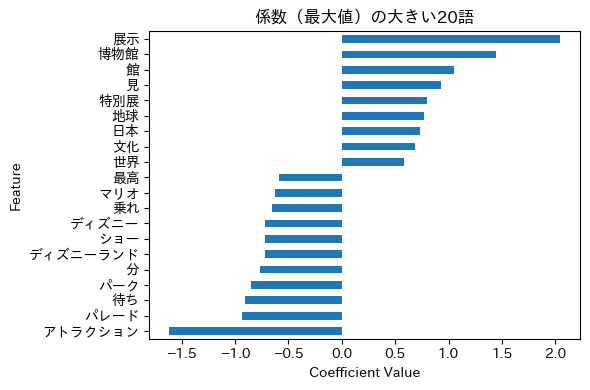

In [13]:
# Áµ∂ÂØæÂÄ§„ÇíÂü∫„Å´‰∏ä‰Ωç„ÅÆÁâπÂæ¥„ÇíÈÅ∏Êäû
top_n = 20
df_coefs["abs_coef"] = df_coefs["coef"].abs()
df_top_features = df_coefs.nlargest(top_n, 'abs_coef').drop(columns=["abs_coef"])

# „Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(3, 6))
df_top_features.sort_values(by="coef").plot.barh(x='feature', y='coef', legend=False, figsize=(6, 4))
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title(f'‰øÇÊï∞ÔºàÊúÄÂ§ßÂÄ§Ôºâ„ÅÆÂ§ß„Åç„ÅÑ{top_n}Ë™û')
plt.tight_layout()
plt.show()

## ÂçöÁâ©È§®„Å®Êé®Ë´ñ„Åï„Çå„Åü„É¨„Éì„É•„Éº

In [14]:
# y„Åå'„Éè„É™„Éù„Çø„ÉÑ„Ç¢„Éº'„Åß„ÅÇ„ÇãX_tfidf„ÇíÂèñÂæó
X_harrypotter = np.array(X)[y == '„Éè„É™„Éù„Çø„ÉÑ„Ç¢„Éº']
X_tfidf_harrypotter = X_tfidf[y == '„Éè„É™„Éù„Çø„ÉÑ„Ç¢„Éº']

# „É≠„Ç∏„Çπ„ÉÜ„Ç£„ÉÉ„ÇØÂõûÂ∏∞„É¢„Éá„É´„Çí‰Ωø„Å£„Å¶Êé®Ë´ñ
predicted_labels = clf.predict(X_tfidf_harrypotter)

# „É©„Éô„É´„Åå1„Åß„ÅÇ„Çã„Çµ„É≥„Éó„É´„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÂèñÂæó
positive_indices = np.where(predicted_labels == '1')[0]

# ÂÖÉ„ÅÆX„Åã„ÇâË©≤ÂΩì„Åô„Çã„Çµ„É≥„Éó„É´„ÇíÂèñÂæó
X_positive_samples = X_harrypotter[positive_indices]

In [15]:
import textwrap

for sample in X_positive_samples:
    wrapped_text = textwrap.fill(sample, width=40)
    print(wrapped_text, "\n")

Â∫óËàóÊÉÖÂ†±‚Üì-----------------------------------
-----------„ÄêÂ∫óÂêç„Äë„Éê„ÉÉ„ÇØ„É≠„ÉÉ„Éà„Ç´„Éï„Çß‚Äª„ÉØ„Éº„Éä„Éº„Éñ„É©„Ç∂„Éº„Çπ„Çπ„Çø„Ç∏„Ç™„ÉÑ„Ç¢
„ÉºÊù±‰∫¨ÂÜÖ„ÄêÂñ∂Ê•≠ÊôÇÈñì„Äë9:30„Äú21:00È†É(„Çπ„Çø„Ç∏„Ç™„ÇØ„É≠„Éº„Ç∫„Åæ„Åß)ÂÆö‰ºëÊó•Ôºö‰∏çÂÆö‰ºë
(„ÉØ„Éº„Éä„Éº„Éñ„É©„Ç∂„Éº„Çπ„Çπ„Çø„Ç∏„Ç™„ÉÑ„Ç¢„ÉºÊù±‰∫¨„Å´Ê∫ñ„Åö„Çã)„Äê„Ç¢„ÇØ„Çª„Çπ„ÄëË•øÊ≠¶Ë±äÂ≥∂Á∑ö
Ë±äÂ≥∂ÂúíÈßÖ„Çà„ÇäÂæíÊ≠©3ÂàÜÈÉΩÂñ∂Âú∞‰∏ãÈâÑÂ§ßÊ±üÊà∏Á∑ö Ë±äÂ≥∂ÂúíÈßÖ„Çà„ÇäÂæíÊ≠©5ÂàÜ„Äê‰∫àÁÆó„Äë4,000„Äú
5,000ÂÜÜ/‰∫∫(„Éá„Ç£„Éä„Éº)„Äê„Ç™„Çπ„Çπ„É°Âà©Áî®„Ç∑„Éº„É≥„Äë„Éá„Éº„Éà„ÉªÂÆ∂Êóè/Âèã‰∫∫„Å®„ÅÆÂà©Áî®„ÄêÈ£ü
„Åπ„É≠„Ç∞Ë©ï‰æ°(Ë®™ÂïèÊó•ÊôÇÁÇπ)„Äë‚≠êÔ∏è„Éã„É•„Éº„Ç™„Éº„Éó„É≥„ÅÆ„Åü„ÇÅ„Å™„Åó-------------
---------------------------------‚òÜ„Ç™„Çπ„Çπ„É°„Éù„Ç§
„É≥„Éà‚òÜ‚ë†„ÅÇ„ÅÆ„Éè„É™„Éº„Éù„ÉÉ„Çø„Éº‰ΩúÂìÅ„Çí„Ç§„É°„Éº„Ç∏„Åó„Åü„Éâ„É™„É≥„ÇØ„Éª„Éï„Éº„Éâ„ÅåÊèÉ„ÅÜ‚ë°„Éò„Éâ„Ç¶„Ç£„Ç∞„Çí
ÂΩ¢Âèñ„Å£„Åü„Éì„Ç∏„É•„Ç¢„É´„Ç±„Éº„Ç≠„Äê„É°„Éã„É•„Éº„Äë„Äå„Ç∞„É™„Éï„Ç£„É≥„Éâ„Éº„É´„Éó„É¨„Éº„Éà(3,200ÂÜÜ)„Äç
„Äå„Éò„Éâ„Ç¶„Ç£„Ç∞„Ç±„Éº„Ç≠(1,500ÂÜÜ)„Äç„Äå„Éê„Çø„Éº„Éì„Éº„É´(1,100

In [16]:
np.mean(predicted_labels.astype(int))

0.21875

## Â•Ω„Åç„Å™Êñá„ÇíÂàÜÈ°û„Åó„Å¶„Åø„Çà„ÅÜ

In [17]:
X_new = [
    "„Ç¢„Ç§„Éå„ÅÆÊñáÂåñ„ÅÆÂ±ïÁ§∫„ÇíË¶ã„Åæ„Åó„Åü„ÄÇ„Åæ„Åü„ÄÅÊâãË©±„ÇíË®ÄË™û„Å®„Åó„Å¶„Åø„Å™„ÅôÂ±ïÁ§∫„ÇÇÊñ∞„Åó„ÅÑÁô∫Ë¶ã„ÅåÂ§ö„Åè„ÅÇ„Çä„Åæ„Åó„Åü„ÄÇ",
    "„Ç∏„Çß„ÉÉ„Éà„Ç≥„Éº„Çπ„Çø„ÉºÊ•Ω„Åó„Åã„Å£„ÅüÔºÅ",
    """12Êúà„Å´„Ç∏„É•„Ç®„É´„Éü„Éç„Éº„Ç∑„Éß„É≥„ÇíË¶≥„Åü„Åè„Å¶Âàù„ÇÅ„Å¶Ë°å„Åç„Åæ„Åó„Åü„ÄÇÂúüÊõúÊó•„ÅßÊ∑∑„Çì„Åß„Åü„Åì„Å®„ÇÇ„ÅÇ„Çä„ÄÅÈßêËªäÂ†¥„ÅØÂ∞ë„ÅóÈõ¢„Çå„ÅüÂ†¥ÊâÄ„Å´„Å™„Çä„Åæ„Åó„Åü„Åå„ÄÅÂÖ•Â†¥Âè£Ëøë„Åè„Åæ„ÅßÁÑ°Êñô„ÅÆ„Ç∑„É£„Éà„É´„Éê„Çπ„ÅåÂá∫„Å¶„ÅÑ„Åæ„Åó„Åü„ÄÇ
    „Ç¢„Éï„Çø„Éº„Éë„Çπ„ÅßÂ§ïÊñπ„Åã„ÇâÂÖ•„Å£„Åü„ÅÆ„ÇÇ„ÅÇ„Çä„ÄÅÂúíÂÜÖÂ∫É„ÅÑ„ÅÆ„ÅßÂÖ®ÁÑ∂Âõû„Çä„Åç„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü„Åå„ÄÅ„Ç∏„É•„Ç®„É´„Éü„Éç„Éº„Ç∑„Éß„É≥„ÅØ„Å®„Å¶„ÇÇÁ∂∫È∫ó„Å†„Å£„Åü„Åó„ÄÅ‰πó„ÇäÁâ©„ÇÇÂ§ß‰∫∫„Åå‰πó„Å£„Å¶„ÇÇÊ•Ω„Åó„ÇÅ„Çã„ÇÇ„ÅÆ„ÇÇÂ§ö„Åè„Å¶ËâØ„Åã„Å£„Åü„Åß„Åô‚òÜ
    „ÅÇ„Å®„ÄÅÊéà‰π≥ÂÆ§„ÅåÔºí„É∂ÊâÄ„Å´„ÅÇ„Çã„ÅÆ„ÇÇÂä©„Åã„Çä„Åæ„Åó„Åü„ÄÇ
    „Ç∏„É•„Ç®„É™„Éº„Éª„Çø„ÉØ„Éº„Å´‰∏ä„Çå„Çã„ÅÆÁü•„Çâ„Å™„Åã„Å£„Åü„ÅÆ„Åß„ÄÅÊ¨°Âõû„ÅØ„Åù„Å°„Çâ„Å´‰∏ä„Å£„Å¶„ÄÅ„Ç∏„É•„Ç®„É™„Éº„Éª„ÇØ„É™„Çπ„Çø„É´„ÅÆÂÖ®ÊôØ„ÇíË¶≥„Å¶„Åø„Åü„ÅÑ„Åß„Åô„ÄÇ
    ÂÜ¨Â†¥„ÅØ„Å®„Å´„Åã„ÅèÂØí„ÅÑ„ÅÆ„Åß„Åó„Å£„Åã„ÇäÈò≤ÂØí„Åó„Å¶Ë°å„Åè„Å®ËâØ„ÅÑ„Å®ÊÄù„ÅÑ„Åæ„Åô„ÄÇ""", # „Çà„Åø„ÅÜ„Çä„É©„É≥„Éâ
    "",  # Â•Ω„Åç„Å™Êñá„ÇíÂàÜÈ°û„Åß„Åç„Åæ„Åô„ÄÇ1„ÅØÂçöÁâ©È§®„ÅÆÂà§ÂÆö„Åß„Åô„ÄÇ
    ]
X_new_tfidf = vectorizer.transform(X_new)
clf.predict(X_new_tfidf)

array(['1', '0', '0', '0'], dtype='<U8')

## Ë£úË∂≥: ‰∫§Â∑ÆÊ§úË®º

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# „É≠„Ç∏„Çπ„ÉÜ„Ç£„ÉÉ„ÇØÂõûÂ∏∞„É¢„Éá„É´„ÅÆ„Ç§„É≥„Çπ„Çø„É≥„Çπ„Çí‰ΩúÊàê
clf = LogisticRegression(max_iter=1000)

# 5ÂàÜÂâ≤‰∫§Â∑ÆÊ§úË®º„Åß‰∫àÊ∏¨„ÇíË°å„ÅÜ
y_pred = cross_val_predict(clf, X_train, y_train, cv=5)

# Á≤æÂ∫¶„ÇíË®àÁÆó
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9453


In [19]:
# Ê∑∑ÂêåË°åÂàó„ÇíË®àÁÆó
cm = confusion_matrix(y_train, y_pred)

# Ê∑∑ÂêåË°åÂàó„ÇíË°®Á§∫
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[122   6]
 [  8 120]]


## „Åä„Åæ„ÅëÔºöÁ¢∫Áéá„ÅÆË®àÁÆó

ÂêÑ„Ç´„ÉÜ„Ç¥„É™„Éº„ÅßÁâπÂæ¥ÁöÑ„Å™Ë™û„ÅÆÊäΩÂá∫

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'


['ÁßëÂ≠¶ÂçöÁâ©È§®' 'Ê∞ëÊóèÂçöÁâ©È§®' '„Éè„É™„Éù„Çø„ÉÑ„Ç¢„Éº' '„Éè„É™„Éù„Çø„ÉÑ„Ç¢„Éº' '„Éè„É™„Éù„Çø„ÉÑ„Ç¢„Éº']


Processing words: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6336/6336 [01:19<00:00, 79.25it/s] 


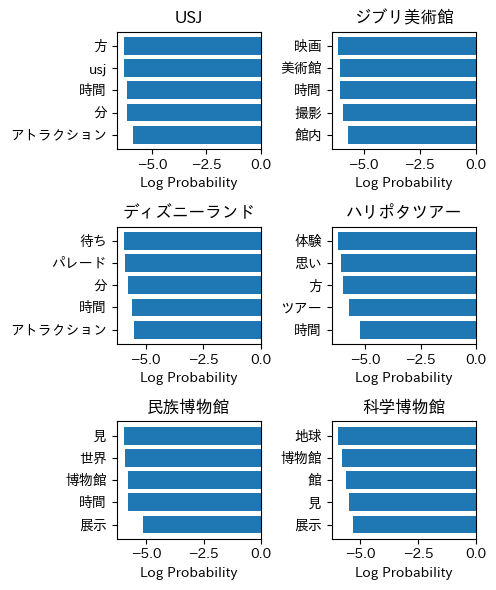

In [20]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=tokenize)

X_vec = vectorizer.fit_transform(X)

classifier = MultinomialNB()
classifier.fit(X_vec, y)
new_X = [
    "Ê∑±Êµ∑„ÅÆÂúßÂäõ",
    "‰∏ñÁïå„ÅÆÊñáÂåñ„Å®Ë®ÄË™û„ÇíÂ≠¶„Åπ„Åü",
    "„Ç´„Ç®„É´„ÅÆ„ÉÅ„Éß„Ç≥„É¨„Éº„Éà„Åä„ÅÑ„Åó„ÅÑ",
    "È≠îÊ≥ï„ÇíÂ≠¶„Åπ„Åü",
    "È≠îÊ≥ï„ÇíÊ•Ω„Åó„ÇÅ„Åü",
]
print(classifier.predict(vectorizer.transform(new_X)))

# „É¢„Éá„É´„Åã„ÇâÁâπÂæ¥„ÅÆÂ∞§Â∫¶„ÇíÂèñÂæó
# feature_log_prob_ndarray of shape (n_classes, n_features)
# Empirical log probability of features given a class, P(x_i|y).
log_prob = classifier.feature_log_prob_

# ÁâπÂæ¥Âêç„ÅÆÂèñÂæó
feature_names = vectorizer.get_feature_names_out()

# „Éá„Éº„Çø„Éï„É¨„Éº„É†„Çí‰ΩúÊàê
df = pd.DataFrame(log_prob.T, columns=classifier.classes_, index=feature_names)

import spacy

# GiNZA„ÅÆ„É¢„Éá„É´„Çí„É≠„Éº„Éâ
nlp = spacy.load('ja_ginza')

# ÂÖ®„Å¶„ÅÆÁâπÂæ¥Âêç„Å´ÂØæ„Åó„Å¶ÂìÅË©ûÊÉÖÂ†±„ÇíÂèñÂæó„Åó„ÄÅÂÜÖÂÆπË™û„ÅÆ„Åø„Çí„É™„Çπ„Éà„Å´‰øùÊåÅ
content_words = []

# for word in feature_names:
for word in tqdm(feature_names, desc="Processing words"):
    doc = nlp(word)
    if len(doc) == 1 and doc[0].pos_ in ['NOUN', 'VERB', 'ADJ']:  # ÂêçË©û„ÄÅÂãïË©û„ÄÅÂΩ¢ÂÆπË©û„ÅÆ„Åø„ÇíÂØæË±°„Å®„Åô„Çã
        content_words.append(word)

# ÁâπÂÆö„ÅÆÈùûÂÜÖÂÆπË™û„ÅÆ„É™„Çπ„Éà
specific_remove_words = ["„ÅÇ„Çã", "„Å™„ÅÑ", "„Åì„Å®", "„ÅÑ", "„Åä", "„ÅÇ„Çä", "„ÅÑ„Çã"]

# ÂÖ®„Å¶„ÅÆÈùûÂÜÖÂÆπË™û„Çí„É™„Çπ„Éà„Å´Ê†ºÁ¥ç
remove_words = [word for word in feature_names if word not in content_words] + specific_remove_words

# „Éá„Éº„Çø„Éï„É¨„Éº„É†„Åã„ÇâÈùûÂÜÖÂÆπË™û„ÇíÈô§Â§ñ
df = df.drop(index=remove_words, errors='ignore')

import numpy as np
import matplotlib.pyplot as plt

# ÂêÑ„Ç´„ÉÜ„Ç¥„É™„Åß‰∏ä‰Ωç5„ÅÆÁâπÂæ¥„ÇíÂèñÂæó
top_n = 5
dfs = []

for column in df.columns:
    top_features = df[column].nlargest(top_n)
    top_features = top_features.reset_index()
    top_features.columns = ["Feature", "Log Probability"]
    top_features["Category"] = column
    dfs.append(top_features)

final_df = pd.concat(dfs, axis=0)

# „É¶„Éã„Éº„ÇØ„Å™„Ç´„ÉÜ„Ç¥„É™Êï∞„ÇíÂèñÂæó
n_categories = len(final_df['Category'].unique())

# „Çµ„Éñ„Éó„É≠„ÉÉ„Éà„ÅÆ‰ΩúÊàê
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(5, 1 * n_categories))
flat_axes = axes.ravel()

for ax, category in zip(flat_axes, final_df['Category'].unique()):
    subset = final_df[final_df['Category'] == category]
    ax.barh(subset['Feature'], subset['Log Probability'], label=category)
    ax.set_title(category)
    ax.set_xlabel('Log Probability')

plt.tight_layout()
plt.show()